# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [450]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
print(study_data_complete)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [451]:
# Checking the number of mice.
study_size = study_data_complete["Mouse ID"].count()
print(study_size)

1893


In [452]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_data_complete.duplicated(subset=["Mouse ID","Timepoint"]).sort_values()

print(duplicates)

0       False
1268    False
1267    False
1266    False
1265    False
        ...  
909      True
917      True
915      True
911      True
913      True
Length: 1893, dtype: bool


In [453]:
# Optional: Get all the data for the duplicate mouse ID. 


In [454]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = study_data_complete.drop_duplicates(subset=["Mouse ID"])
print(cleaned_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [455]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_size = cleaned_data["Mouse ID"].count()
print(cleaned_data_size)

249


## Summary Statistics

In [456]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
cleaned_data_group = cleaned_data.groupby("Tumor Volume (mm3)")
average = cleaned_data_group.mean()
median_value = cleaned_data_group.median()
variance = cleaned_data_group.var()
stand_dev = cleaned_data_group.std()
data_SEM = cleaned_data_group.sem()

In [457]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.merge(average, median_value, "outer", on="Tumor Volume (mm3)")
summary_table = summary_table.rename(columns={"Age_months_x":"Avg Age(months)", "Weight (g)_x":
    "Avg Weight(g)", "Timepoint_x":"Avg Timepoint", "Metastatic Sites_x": "Avg Metastatic Sites",
    "Age_months_y":"Median Age(months)", "Weight (g)_y":
    "Median Weight(g)", "Timepoint_y":"Median Timepoint", "Metastatic Sites_y":
                                          "Median   Metastatic Sites" })


summary_table = summary_table.merge(variance, "outer", on="Tumor Volume (mm3)")

summary_table = summary_table.rename(columns={"Age_months":"variance Age(months)", "Weight (g)":
    "variance Weight(g)", "Timepoint":"variance Timepoint", "Metastatic Sites":
    "variance Metastatic Sites"})
summary_table = summary_table.merge(stand_dev, "outer", on="Tumor Volume (mm3)")

summary_table = summary_table.rename(columns={"Age_months":"st deviation Age(months)", "Weight (g)":
    "st deviation Weight(g)", "Timepoint":"vst deviation Timepoint", "Metastatic Sites":
    "st deviation Metastatic Sites"})
summary_table = summary_table.merge(data_SEM, "outer", on="Tumor Volume (mm3)")
summary_table = summary_table.rename(columns={"Age_months":"SEM Age(months)", "Weight (g)":
    "SEM Weight(g)", "Timepoint":"SEM Timepoint", "Metastatic Sites":
    "SEM Metastatic Sites"})
print(summary_table)
# Using the aggregation method, produce the same summary statistics in a single line


                    Avg Age(months)  Avg Weight(g)  Avg Timepoint  \
Tumor Volume (mm3)                                                  
45.0                      12.730924      26.116466            0.0   

                    Avg Metastatic Sites  Median Age(months)  \
Tumor Volume (mm3)                                             
45.0                                 0.0                  13   

                    Median Weight(g)  Median Timepoint  \
Tumor Volume (mm3)                                       
45.0                              27                 0   

                    Median   Metastatic Sites  variance Age(months)  \
Tumor Volume (mm3)                                                    
45.0                                        0             52.253919   

                    variance Weight(g)  variance Timepoint  \
Tumor Volume (mm3)                                           
45.0                         13.667833                 0.0   

                    var

## Bar and Pie Charts

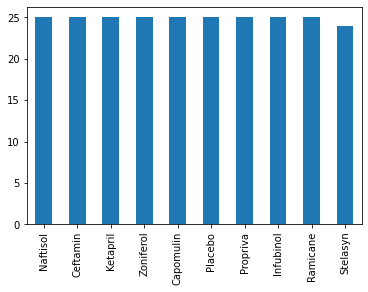

In [458]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = cleaned_data["Drug Regimen"].unique()
drug_count = cleaned_data["Drug Regimen"].value_counts()


# drug_count = cleaned_data.count()

ax = drug_count.plot.bar(x="Drug Regimen")


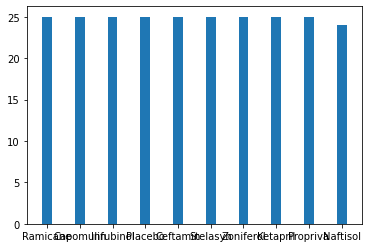

In [459]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
drugs = cleaned_data["Drug Regimen"].unique()
drug_count = cleaned_data["Drug Regimen"].value_counts()
# drug_count = cleaned_data.count()


ax = plt.bar(x=drugs, height=drug_count, width = 0.3, )

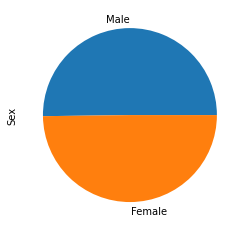

In [460]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = cleaned_data["Sex"].value_counts(normalize=True)

pdpie = gender.plot.pie()

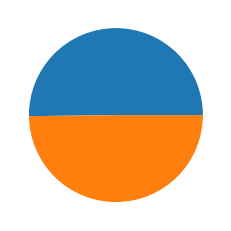

In [461]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pltpie = plt.pie(gender)

## Quartiles, Outliers and Boxplots

In [462]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [463]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

# Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles_store = study_data_complete.loc[study_data_complete['Drug Regimen'] == drug]
    tumor_vol_list.append(quartiles_store["Tumor Volume (mm3)"])

# add subset

    quartiles = quartiles_store["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = quartiles_store.loc[(quartiles_store['Tumor Volume (mm3)']
                            < lower_bound) | (quartiles_store['Tumor Volume (mm3)']
                                              > upper_bound)]
# Determine outliers using upper and lower bounds

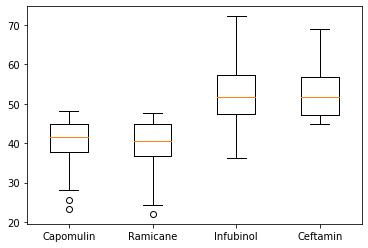

In [464]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplt1 = plt.boxplot(tumor_vol_list, labels=treatment_list)

## Line and Scatter Plots

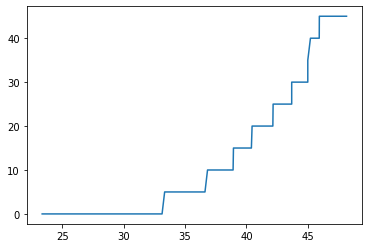

In [473]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_data = study_data_complete[["Tumor Volume (mm3)", "Timepoint", "Drug Regimen"]]
line_data = line_data.loc[line_data["Drug Regimen"] == "Capomulin"]
points = line_data["Timepoint"]
x_axis_data = line_data["Tumor Volume (mm3)"]
points = points.sort_values()
x_axis_data = x_axis_data.sort_values()
line_plot = plt.plot(x_axis_data, points)

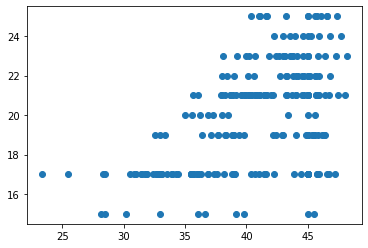

In [466]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = study_data_complete[["Tumor Volume (mm3)", "Weight (g)", "Drug Regimen"]]
scatter_data = scatter_data.loc[scatter_data["Drug Regimen"] == "Capomulin"]

scatter1 = plt.scatter(x= scatter_data["Tumor Volume (mm3)"], y=scatter_data["Weight (g)"])

## Correlation and Regression

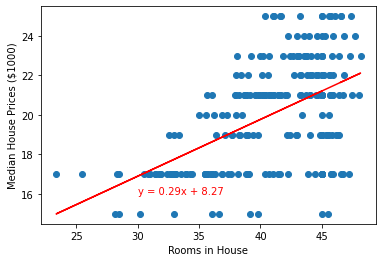

In [469]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrr = scatter_data.corr()
x_values = scatter_data["Tumor Volume (mm3)"]
y_values = scatter_data["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,16),fontsize=10,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
